# Reinforcement Learning

# 1. Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

In all considered models, rewards are attached to reached **states**. In games for instance, the reward of a state is +1 if you win, -1 if you loose, 0 in all other cases.


In [1]:
import sys
from pathlib import Path

lib_path = str(Path.cwd().parent)

if lib_path not in sys.path:
    sys.path.append(lib_path)
print(sys.path)

['C:\\Python312\\python312.zip', 'C:\\Python312\\DLLs', 'C:\\Python312\\Lib', 'C:\\Python312', 'd:\\Code\\Reinforcement Learning\\venv', '', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages\\win32', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages\\win32\\lib', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages\\Pythonwin', 'd:\\Code\\Reinforcement Learning']


In [2]:
import numpy as np

In [3]:
from lib.model import Walk, Maze

Each model is an object of the class `Environment` storing the current state.


In [4]:
from lib.model import Environment

In [5]:
methods_environment = [method for method in dir(Environment) if "__" not in method]
methods_environment

['decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_model',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reset',
 'show',
 'step']

The agent interacts with the environment and collects rewards.


In [6]:
from lib.agent import Agent

In [7]:
methods_agent = [method for method in dir(Agent) if "__" not in method]
methods_agent

['get_action',
 'get_actions',
 'get_episode',
 'get_gains',
 'one_step_policy',
 'random_policy']

## Walk

We start with a walk in a square. Some states (to be found) have positive rewards. Some wind (unknown) disturbs the walk.


In [8]:
# environment
model = Walk()

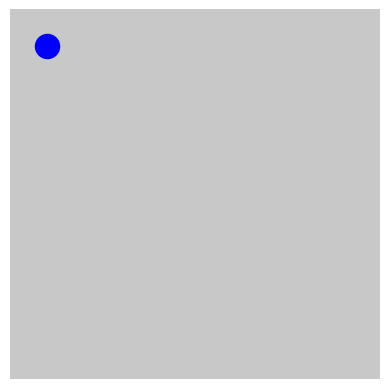

In [9]:
model.display()

In [10]:
model.Size

(5, 5)

In [11]:
# rewards (to be discovered)
model.Rewards

{(1, 1): 1, (1, 3): -1, (3, 1): -1, (3, 3): 3}

In [12]:
# wind (move probabilities)
model.Wind

{(0, 1): 0.1, (1, 0): 0.2}

In [13]:
state = model.state

In [14]:
state

array([0, 0])

In [15]:
model.get_actions(state)

[(0, 1), (1, 0)]

In [16]:
action = (0, 1)

In [17]:
model.step(action)

(0, False)

In [18]:
model.state

array([0, 2])

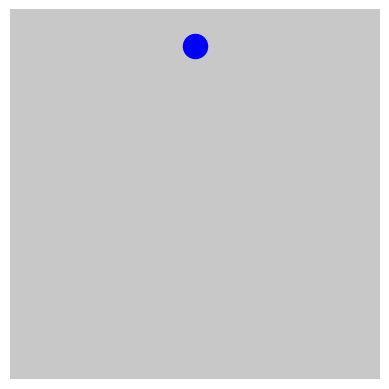

In [19]:
model.display()

In [20]:
# agent with random policy (default)
agent = Agent(model)

In [21]:
state = model.state
action = agent.get_action(state)

In [22]:
state

array([0, 2])

In [23]:
action

(0, -1)

In [24]:
# interaction with the environment
reward, stop = model.step(action)

In [25]:
reward

0

In [26]:
stop

False

In [27]:
# all possible actions
agent.get_actions(state)

[(0, 1), (0, -1), (1, 0)]

In [28]:
# policy of the agent
probs, actions = agent.policy(state)

In [29]:
print(probs)

[0.33333333 0.33333333 0.33333333]


In [30]:
print(actions)

[(0, 1), (0, -1), (1, 0)]


In [31]:
# an episode
stop, states, rewards = agent.get_episode(horizon=50)

In [32]:
# the episode includes the initial state
len(states)

51

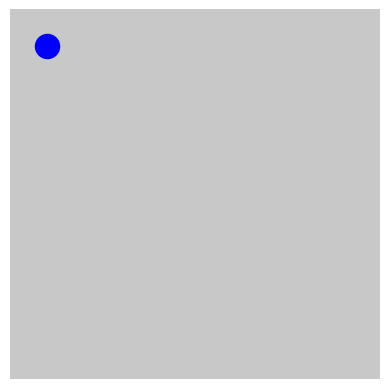

In [33]:
# display
animation = model.display(states)

In [34]:
animation

In [35]:
# initial reward = 0 by convention
len(rewards)

50

In [36]:
np.sum(rewards)

np.int64(10)

In [37]:
# gains from initial state, with discount factor
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)
np.mean(gains)

np.float64(2.0109593574598486)

## To do


- Test the weighted random policy where the probability of each move is proportional to its weight.
- Is this policy better than the (pure) random policy?


In [38]:
weights = {(0, 1): 2, (1, 0): 2, (0, -1): 1, (-1, 0): 1}

In [39]:
def weighted_random_policy(state, weights=weights):
    actions = Walk().get_actions(state)
    # to be modified
    probs = np.array([weights[action] for action in actions])

    if np.sum(probs):
        probs = probs / np.sum(probs)
    else:
        probs = np.ones(len(actions)) / len(actions)

    return probs, actions

In [40]:
agent = Agent(model, policy=weighted_random_policy)

In [41]:
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)
np.mean(gains)

np.float64(1.2254928847845807)

## Maze

Now let's try to escape a maze!


In [42]:
maze_map = np.load("../lib/maze.npy")

In [43]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [44]:
model = Maze()

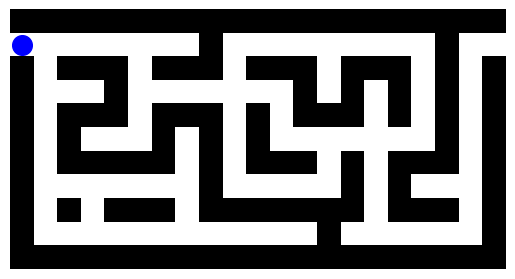

In [45]:
model.display()

In [46]:
model.state

array([1, 0])

In [47]:
state = model.state
reward = model.get_reward(state)

In [48]:
# -1 in any state except the exit
reward

-1

In [49]:
model.get_actions(state)

[(0, 1)]

In [50]:
action = (0, 1)

In [51]:
model.step(action)

(-1, False)

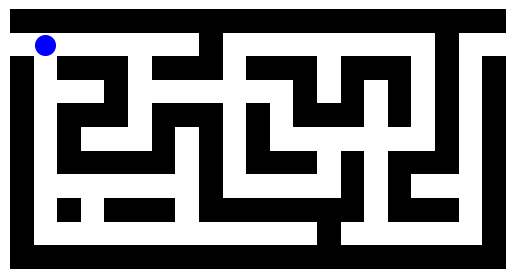

In [52]:
model.display()

In [53]:
# agent with random policy
agent = Agent(model)

In [54]:
stop, states, rewards = agent.get_episode(horizon=200)

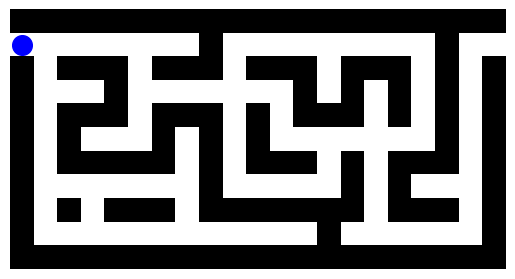

In [55]:
animation = model.display(states)

In [56]:
animation

In [57]:
# time in the Maze
-np.sum(rewards)

np.int64(200)

## To do


- Test the weighted random policy.
- Which choice of the weights looks the best for this maze?


In [58]:
weights = {(0, 1): 5, (1, 0): 2, (-1, 0): 2, (0, -1): 1}

In [59]:
def weighted_random_policy(state, weights=weights):
    actions = Maze().get_actions(state)
    # to be modified
    probs = np.array([weights[action] for action in actions])

    if np.sum(probs):
        probs = probs / np.sum(probs)
    else:
        probs = np.ones(len(actions)) / len(actions)

    return probs, actions

In [60]:
agent = Agent(model, policy=weighted_random_policy)

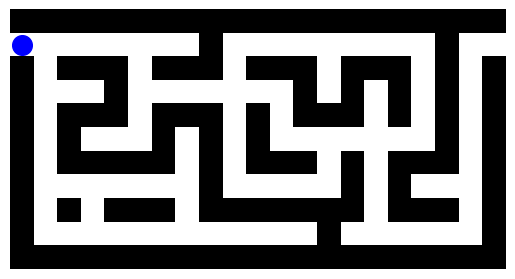

In [61]:
stop, states, rewards = agent.get_episode(horizon=1000)
animation = model.display(states)

In [62]:
animation

## Games

Finally, let's play games!<br>
Note that in most games:

- you play against an adversary (which is part of the environment),
- you may play first or second,
- when your adversary plays, you have only one possible action (let your adversary play),
- you can also impose an action to your adversary (useful for training).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim), [Connect Four](https://en.wikipedia.org/wiki/Connect_Four) and [Five in a row](https://en.wikipedia.org/wiki/Gomoku).
Feel free to add more :-)


In [63]:
from lib.model import TicTacToe, Nim, ConnectFour, FiveInRow

Each game is an object of the class `Game`.


In [64]:
from lib.model import Game

In [65]:
methods_game = [method for method in dir(Game) if "__" not in method]
methods_game

['Board_Size',
 'decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_available_actions',
 'get_model',
 'get_next_state',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reset',
 'show',
 'step']

The method `get_next_state` allows you to get the next state for any (state, action) pair, without modifying the current state. This will be useful to learn good policies.

The method `get_available_actions` gives the available actions, ignoring the player.


In [66]:
set(methods_game) - set(methods_environment)

{'Board_Size', 'get_available_actions', 'get_next_state'}

## Tic-Tac-Toe


We start with Tic-Tac-Toe.


### Play first


In [67]:
# game against a random player (default)
game = TicTacToe()

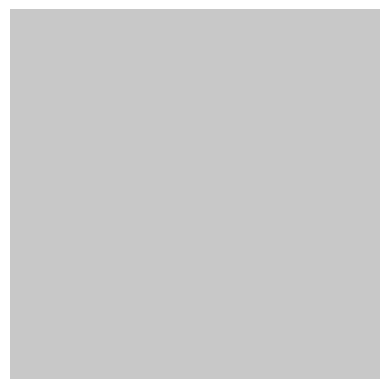

In [68]:
game.display()

In [69]:
# next player, board
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [70]:
# your possible actions
game.get_actions(game.state)

[(np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(1)),
 (np.int64(0), np.int64(2)),
 (np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(1), np.int64(2)),
 (np.int64(2), np.int64(0)),
 (np.int64(2), np.int64(1)),
 (np.int64(2), np.int64(2))]

In [71]:
# next state given some move
game.get_next_state(game.state, (1, 1))

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [72]:
# the state is not modified
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [73]:
# you play at random (default)
agent = Agent(game)

In [74]:
# you play as player 1 (default)
agent.player

1

In [75]:
# your adversary plays as player -1
game.adversary.player

-1

In [76]:
state = game.state
action = agent.get_action(state)

In [77]:
action

(np.int64(1), np.int64(0))

In [78]:
reward, stop = game.step(action)

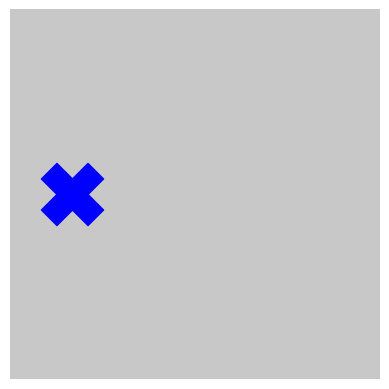

In [79]:
# you're blue
game.display()

In [80]:
game.state

(-1,
 array([[0, 0, 0],
        [1, 0, 0],
        [0, 0, 0]]))

In [81]:
# all possible moves
game.get_actions(game.state)

[None]

In [82]:
# your moves (not your turn)
agent.get_actions(game.state)

[None]

In [83]:
action = agent.get_action(game.state)

In [84]:
print(action)

None


In [85]:
reward, stop = game.step(action)

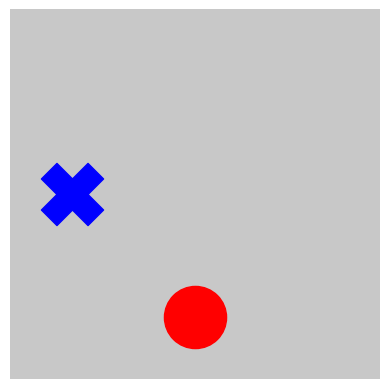

In [86]:
game.display()

In [87]:
stop, states, rewards = agent.get_episode()

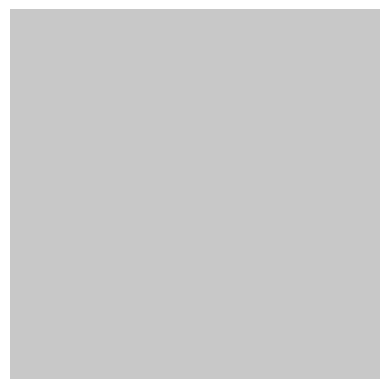

In [88]:
animation = game.display(states)

In [89]:
animation

In [90]:
rewards

[0, 0, 0, 0, 0, -1]

In [91]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([31, 11, 58]))

### Play second


In [92]:
# your adversary starts
game = TicTacToe(play_first=False)

In [93]:
game.first_player

-1

In [94]:
# you still play at random
agent = Agent(game)

In [95]:
stop, states, rewards = agent.get_episode()

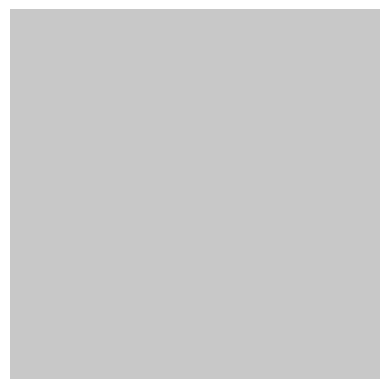

In [96]:
animation = game.display(states)

In [97]:
# you're still blue, red starts
animation

In [98]:
rewards

[0, 0, 0, 0, 0, 0, 0, 1]

In [99]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([41, 26, 33]))

### Control your adversary

You can force the actions of your adversary (useful for training).


In [100]:
game = TicTacToe()

In [101]:
actions = [(0, 0), (1, 1), (0, 2), (2, 2), (0, 1)]

In [102]:
for action in actions:
    game.step(action)

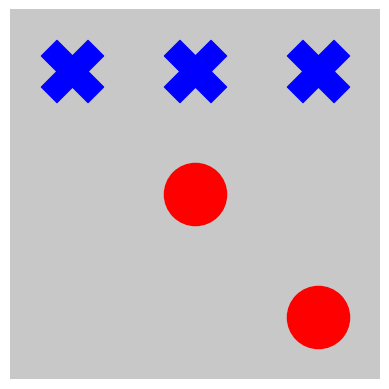

In [103]:
game.display()

### One step ahead


In [104]:
# your adversary is random
game = TicTacToe()

In [105]:
# you play with one-step ahead policy
agent = Agent(game, policy="one_step")

In [106]:
stop, states, rewards = agent.get_episode()

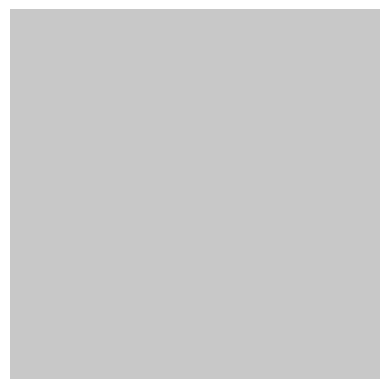

In [107]:
animation = game.display(states)

In [108]:
animation

In [109]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([ 1, 12, 87]))

In [110]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy="one_step")

In [111]:
agent = Agent(game, policy="one_step")

In [112]:
stop, states, rewards = agent.get_episode()

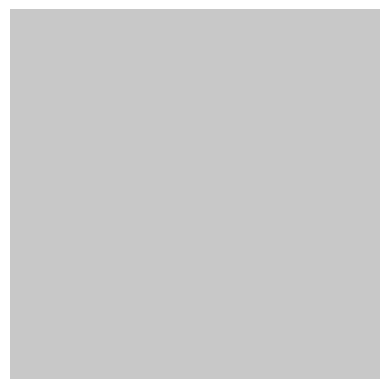

In [113]:
animation = game.display(states)

In [114]:
animation

In [115]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([13, 52, 35]))

## Nim


### Random players


In [116]:
# game against a random player (default)
game = Nim()

In [117]:
game.state

(1, array([1, 3, 5, 7]))

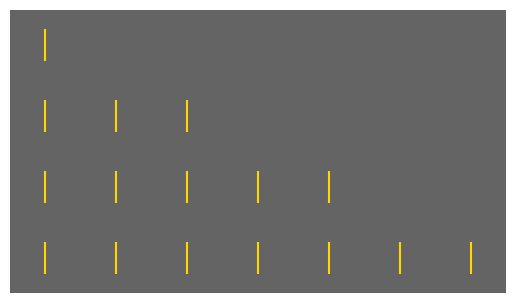

In [118]:
game.display()

In [119]:
# player, board
game.state

(1, array([1, 3, 5, 7]))

In [120]:
# you play at random
agent = Agent(game)

In [121]:
state = game.state
action = agent.get_action(state)

In [122]:
action

(np.int64(2), 1)

In [123]:
reward, stop = game.step(action)

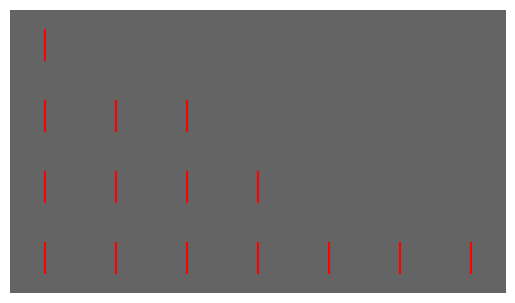

In [124]:
game.display()

In [125]:
stop, states, rewards = agent.get_episode()

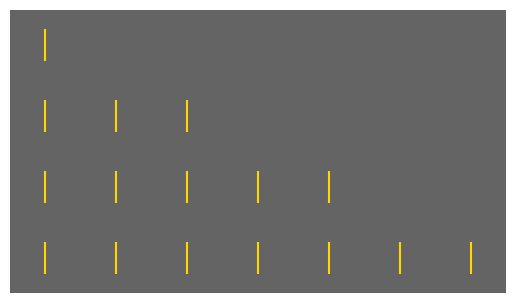

In [126]:
animation = game.display(states)

In [127]:
animation

In [128]:
rewards

[0, 0, 0, 0, 0, 0, -1]

In [129]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([45, 55]))

### One step ahead


In [130]:
game = Nim(adversary_policy="one_step")

In [131]:
agent = Agent(game, policy="one_step")

In [132]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([46, 54]))

## Connect Four


### Random players


In [133]:
# game against a random player
game = ConnectFour()

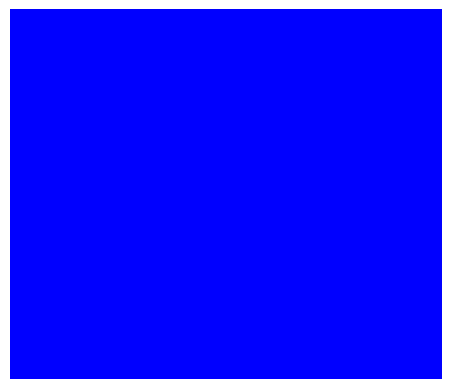

In [134]:
game.display()

In [135]:
game.state

(1,
 array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]))

In [136]:
# you play at random
agent = Agent(game)

In [137]:
stop, states, rewards = agent.get_episode()

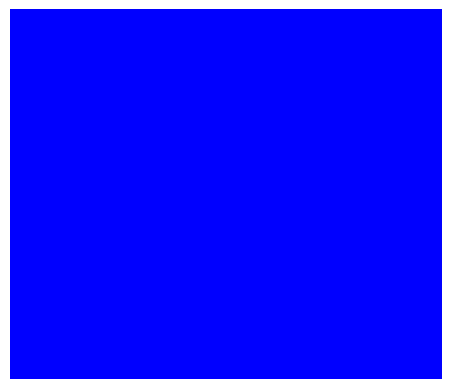

In [138]:
animation = game.display(states)

In [139]:
# you play yellow
animation

In [140]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([3, 7]))

### One step ahead


In [141]:
game = ConnectFour(adversary_policy="one_step")

In [142]:
agent = Agent(game, policy="one_step")

In [143]:
stop, states, rewards = agent.get_episode()

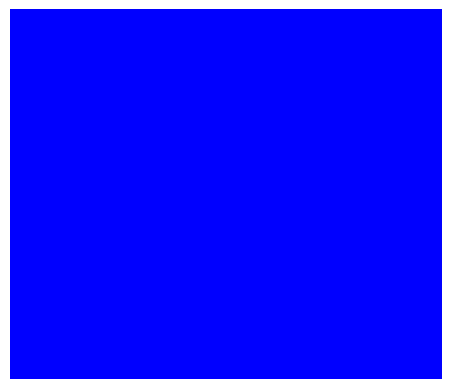

In [144]:
animation = game.display(states)

In [145]:
animation

In [146]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([5, 5]))

## Five-in-a-row


### Random players


In [147]:
game = FiveInRow()

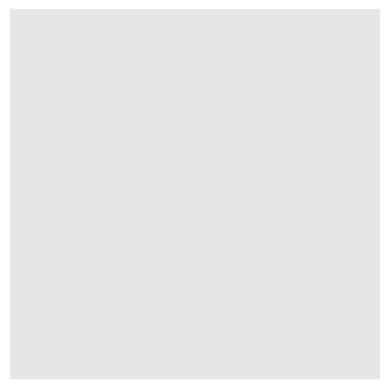

In [148]:
game.display()

In [149]:
agent = Agent(game)

In [150]:
stop, states, rewards = agent.get_episode()

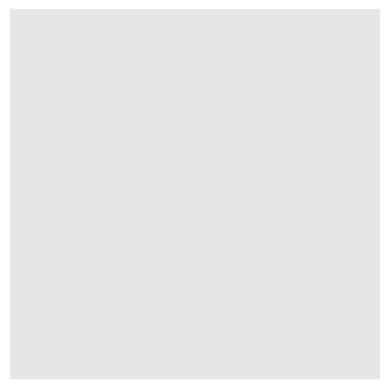

In [151]:
animation = game.display(states)

In [152]:
animation

In [153]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([5, 5]))

### One step ahead


In [154]:
game = FiveInRow()

In [155]:
agent = Agent(game, policy="one_step")

In [156]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

(array([1]), array([5]))

In [157]:
# a better adversary
game = FiveInRow(adversary_policy="one_step")

In [158]:
agent = Agent(game, policy="one_step")

In [159]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

(array([-1,  0,  1]), array([1, 1, 3]))

## Value function

The value function of a policy can be computed from Bellman's equation, provided the state space is not too large.


You can check this condition by listing all states.


In [160]:
model = Walk()

In [161]:
len(model.get_all_states())

25

## To do

- Complete the method `evaluate_policy` of the class `PolicyEvaluation`.
- Evaluate the random policy in the `Walk` model and display the value function.
- Observe the impact of the wind on the value function.
- Display the value function of the random policy in the maze.


In [162]:
# we use sparse transition matrices
from scipy import sparse

In [163]:
class PolicyEvaluation:
    """Evaluation of a policy by dynamic programming.

    Parameters
    ----------
    model: object of class Environment
        Model.
    policy: function
        Policy of the agent.
    player: int
        Player for games (1 or -1, default = default player of the game).
    gamma: float
        Discount factor (between 0 and 1).
    n_eval: int
        Number of iterations of Bellman's equation for policy evaluation.
    """

    def __init__(self, model, policy="random", player=None, gamma=1, n_eval=100):
        self.model = model
        agent = Agent(model, policy, player)
        self.policy = agent.policy
        self.player = agent.player
        self.gamma = gamma
        self.n_eval = n_eval
        self.index_states()
        if self.n_states == 0:
            raise ValueError("Not applicable. The state space is too large.")
        self.get_rewards()
        self.get_transitions()

    def index_states(self):
        """Index all states."""
        self.states = self.model.get_all_states()
        self.n_states = len(self.states)
        self.state_id = {
            self.model.encode(state): i for i, state in enumerate(self.states)
        }

    def get_state_id(self, state):
        return self.state_id[self.model.encode(state)]

    def get_rewards(self):
        """Get the reward of each state."""
        rewards = np.zeros(self.n_states)
        for i, state in enumerate(self.states):
            rewards[i] = self.model.get_reward(state)
        self.rewards = rewards

    def get_actions(self, state, player=None):
        if self.model.is_game():
            if player is None:
                player = self.player
            actions = self.model.get_actions(state, player)
        else:
            actions = self.model.get_actions(state)
        return actions

    def get_transitions(self):
        """Get the transitions (probabilities to move from one state to another) for each action."""
        actions = self.model.get_all_actions()
        transitions = {
            action: sparse.lil_matrix((self.n_states, self.n_states))
            for action in actions
        }
        for i, state in enumerate(self.states):
            actions = self.get_actions(state)
            for action in actions:
                probs, next_states = self.model.get_transition(state, action)
                indices = np.array(
                    [self.get_state_id(next_state) for next_state in next_states]
                )
                transitions[action][i, indices] = np.array(probs)
        self.transitions = {
            action: sparse.csr_matrix(transition)
            for action, transition in transitions.items()
        }

    def evaluate_policy(self):
        """Evaluate a policy by iteration of Bellman's equation."""
        transitions = self.transitions
        # probability of each action over the states
        probs = {action: np.zeros(self.n_states) for action in transitions}
        for state in self.states:
            i = self.get_state_id(state)
            for prob, action in zip(*self.policy(state)):
                probs[action][i] = prob
        # Bellman's equation
        values = np.zeros(self.n_states)
        for _ in range(self.n_eval):
            next_values = self.rewards + self.gamma * values
            values = np.zeros(self.n_states)
            for action, transition in transitions.items():
                values += probs[action] * transition.dot(next_values)
        self.values = values

In [164]:
model = Walk()
agent = Agent(model)
random_policy = agent.policy

In [165]:
model.Wind

{(0, 1): 0.1, (1, 0): 0.2}

In [166]:
gamma = 0.9
algo = PolicyEvaluation(model, random_policy, gamma=gamma)

In [167]:
algo.evaluate_policy()

In [168]:
values = algo.values

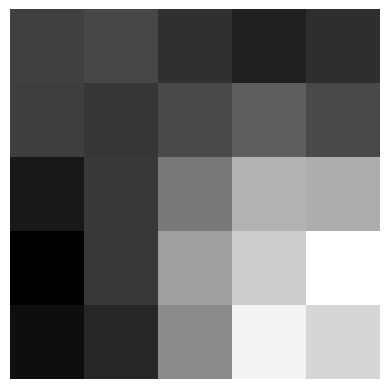

In [169]:
model.display_values(values)

In [170]:
gains = agent.get_gains(gamma=gamma)
np.mean(gains)

np.float64(1.2465832659853933)

In [171]:
state = model.init_state()
i = algo.get_state_id(state)
values[i]

np.float64(1.144545208165502)

In [172]:
wind = {(0, 1): 0.75}
Walk.set_parameters(Walk.Size, Walk.Rewards, wind)

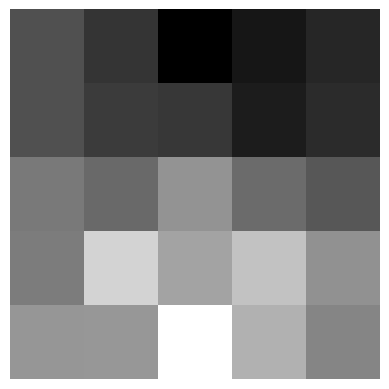

In [173]:
model = Walk()

algo = PolicyEvaluation(model, random_policy, gamma=gamma)
algo.evaluate_policy()

values = algo.values
model.display_values(values)

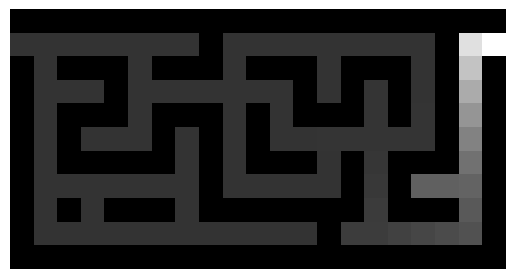

In [174]:
model = Maze()

algo = PolicyEvaluation(model)
algo.evaluate_policy()

values = algo.values
model.display_values(values)

## To do

- Evaluate the random policy and the one-step policy in some games, when possible.
- Do the same when the adversary plays with the one-step policy.
- Predict some first good moves for each of these game.


## Tic-Tac-Toe


In [175]:
# random players
Game = TicTacToe
game = Game()

In [176]:
algo = PolicyEvaluation(game)

In [177]:
algo.evaluate_policy()

In [178]:
values = algo.values

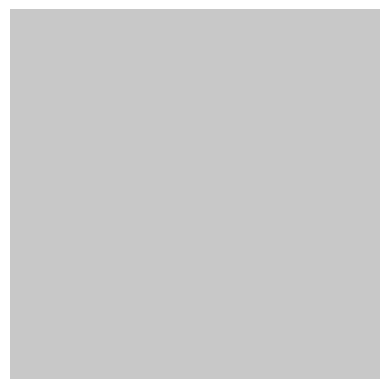

In [179]:
game.display()

In [180]:
i = algo.get_state_id(game.state)
values[i]

np.float64(0.2968253968253967)

In [181]:
game.step((0, 0))

(0, np.False_)

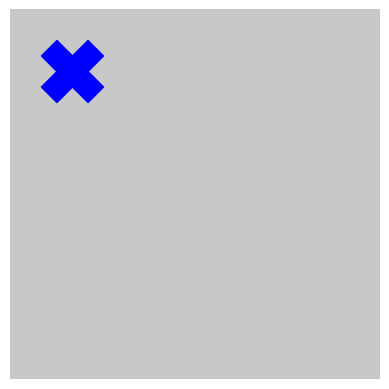

In [182]:
game.display()

In [183]:
i = algo.get_state_id(game.state)
values[i]

np.float64(0.3428571428571428)

In [184]:
# your adversary move
game.step((1, 1))

(0, np.False_)

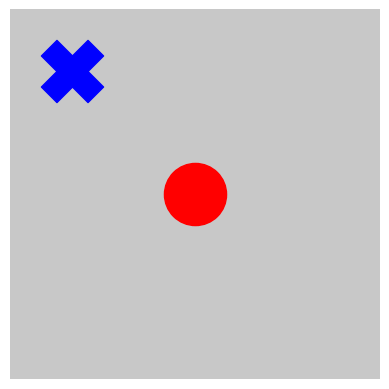

In [185]:
game.display()

In [186]:
i = algo.get_state_id(game.state)
values[i]

np.float64(0.11428571428571427)

In [187]:
# best move in the initial state
state = game.init_state()

In [188]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [189]:
action_value

{(np.int64(0), np.int64(0)): np.float64(0.3428571428571428),
 (np.int64(0), np.int64(1)): np.float64(0.19999999999999996),
 (np.int64(0), np.int64(2)): np.float64(0.3428571428571428),
 (np.int64(1), np.int64(0)): np.float64(0.19999999999999998),
 (np.int64(1), np.int64(1)): np.float64(0.49999999999999983),
 (np.int64(1), np.int64(2)): np.float64(0.19999999999999998),
 (np.int64(2), np.int64(0)): np.float64(0.34285714285714275),
 (np.int64(2), np.int64(1)): np.float64(0.2),
 (np.int64(2), np.int64(2)): np.float64(0.34285714285714286)}

In [190]:
best_action = max(action_value, key=action_value.get)

In [191]:
best_action

(np.int64(1), np.int64(1))

In [192]:
game = Game()

In [193]:
game.step(best_action)

(0, np.False_)

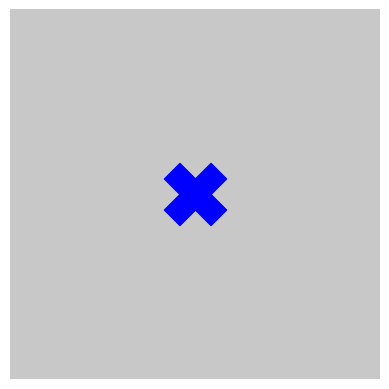

In [194]:
game.display()

In [195]:
# one-step policy
game = Game()
algo = PolicyEvaluation(game, policy="one_step")
algo.evaluate_policy()

In [196]:
values = algo.values
i = algo.get_state_id(game.state)
values[i]

np.float64(0.8824514991181656)

In [197]:
state = game.state

In [198]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [199]:
action_value

{(np.int64(0), np.int64(0)): np.float64(0.8987103174603173),
 (np.int64(0), np.int64(1)): np.float64(0.8483134920634919),
 (np.int64(0), np.int64(2)): np.float64(0.8987103174603172),
 (np.int64(1), np.int64(0)): np.float64(0.8483134920634919),
 (np.int64(1), np.int64(1)): np.float64(0.9539682539682537),
 (np.int64(1), np.int64(2)): np.float64(0.8483134920634919),
 (np.int64(2), np.int64(0)): np.float64(0.8987103174603173),
 (np.int64(2), np.int64(1)): np.float64(0.8483134920634919),
 (np.int64(2), np.int64(2)): np.float64(0.8987103174603172)}

In [200]:
best_action = max(action_value, key=action_value.get)

In [201]:
best_action

(np.int64(1), np.int64(1))

In [202]:
# one-step players
game = Game(adversary_policy="one_step")
algo = PolicyEvaluation(game, policy="one_step")
algo.evaluate_policy()

In [203]:
values = algo.values
i = algo.get_state_id(game.state)
values[i]

np.float64(0.13756613756613756)

In [204]:
state = game.state

In [205]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [206]:
action_value

{(np.int64(0), np.int64(0)): np.float64(0.2349206349206349),
 (np.int64(0), np.int64(1)): np.float64(0.010019841269841257),
 (np.int64(0), np.int64(2)): np.float64(0.2349206349206349),
 (np.int64(1), np.int64(0)): np.float64(0.01001984126984126),
 (np.int64(1), np.int64(1)): np.float64(0.2583333333333333),
 (np.int64(1), np.int64(2)): np.float64(0.010019841269841264),
 (np.int64(2), np.int64(0)): np.float64(0.23492063492063495),
 (np.int64(2), np.int64(1)): np.float64(0.010019841269841269),
 (np.int64(2), np.int64(2)): np.float64(0.2349206349206349)}

In [207]:
best_action = max(action_value, key=action_value.get)

In [208]:
best_action

(np.int64(1), np.int64(1))

## Nim


In [209]:
Game = Nim

In [210]:
# one-step players
game = Game(adversary_policy="one_step")
algo = PolicyEvaluation(game, policy="one_step")
algo.evaluate_policy()

In [211]:
values = algo.values
i = algo.get_state_id(game.state)
values[i]

np.float64(0.0)

In [212]:
state = game.state

In [213]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [214]:
# all actions have the same value
action_value

{(np.int64(0), 1): np.float64(0.0),
 (np.int64(1), 1): np.float64(0.0),
 (np.int64(1), 2): np.float64(0.0),
 (np.int64(1), 3): np.float64(0.0),
 (np.int64(2), 1): np.float64(0.0),
 (np.int64(2), 2): np.float64(0.0),
 (np.int64(2), 3): np.float64(0.0),
 (np.int64(2), 4): np.float64(0.0),
 (np.int64(2), 5): np.float64(0.0),
 (np.int64(3), 1): np.float64(0.0),
 (np.int64(3), 2): np.float64(0.0),
 (np.int64(3), 3): np.float64(0.0),
 (np.int64(3), 4): np.float64(0.0),
 (np.int64(3), 5): np.float64(0.0),
 (np.int64(3), 6): np.float64(0.0),
 (np.int64(3), 7): np.float64(0.0)}

In [215]:
# another state, later in the match
game.state = (1, np.array([1, 3, 0, 0]))

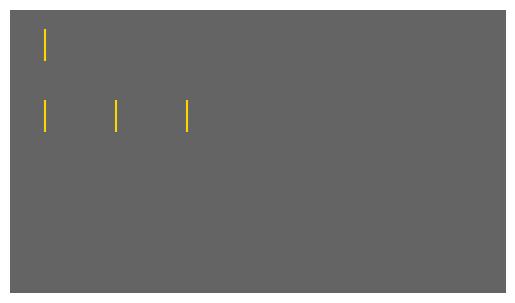

In [216]:
game.display()

In [217]:
state = game.state

In [218]:
action_value = dict()
for action in game.get_actions(state):
    next_state = game.get_next_state(state, action)
    i = algo.get_state_id(next_state)
    action_value[action] = values[i]

In [219]:
# all actions have the same value
action_value

{(np.int64(0), 1): np.float64(0.0),
 (np.int64(1), 1): np.float64(0.0),
 (np.int64(1), 2): np.float64(-1.0),
 (np.int64(1), 3): np.float64(1.0)}

In [220]:
best_action = max(action_value, key=action_value.get)

In [221]:
best_action

(np.int64(1), 3)

In [222]:
game.step(best_action)

(0, False)

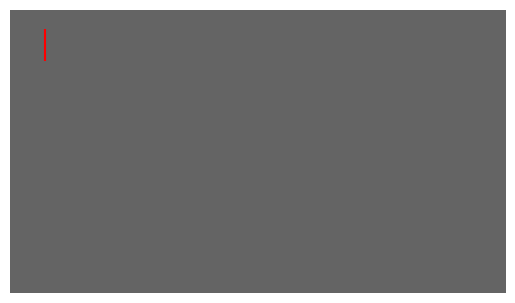

In [223]:
game.display()